In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"]=(8,5)
plt.rcParams["font.size"]=10


In [38]:
train=pd.read_csv("C:\\Users\\BABU\\Downloads\\train_v9rqX0R (1).csv")
test=pd.read_csv("C:\\Users\\BABU\\Downloads\\test_AbJTz2l (1).csv")
train.shape,test.shape

((8523, 12), (5681, 11))

In [39]:
sales=pd.concat([train,test],ignore_index=True)
sales.shape

(14204, 12)

In [40]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [41]:
# statistics of numerical data
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [42]:
sales.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

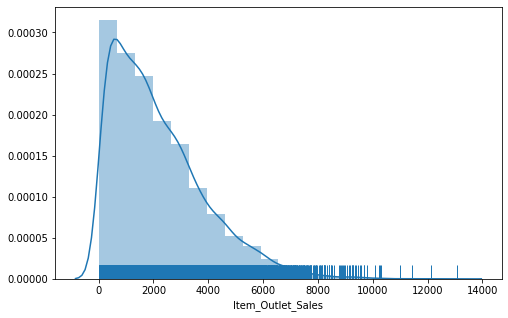

In [43]:
# Distribution of target values
sns.distplot(sales['Item_Outlet_Sales'],bins=20,rug=True,hist=True)
plt.show()
#It is a right skewed data

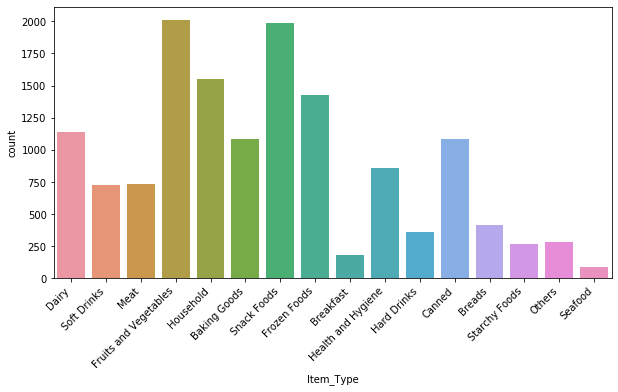

In [44]:
# DIFFERENT Item_Type PRESENT IN THE RETAIL STORE
plt.figure(figsize=(10,5))
sns.countplot('Item_Type',data=sales)
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

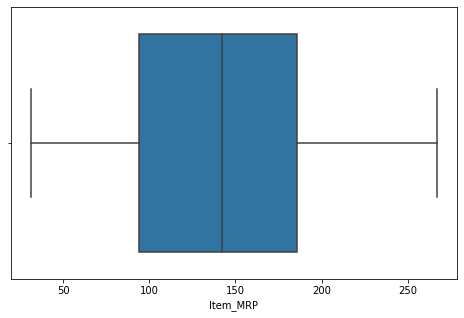

In [45]:
sns.boxplot(sales["Item_MRP"])

In [46]:
plot_fig=sales.groupby('Outlet_Type').agg({'Item_Outlet_Sales':'mean'}).sort_values(by='Item_Outlet_Sales',ascending=False).reset_index()
plot_fig

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type3,3694.038558
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Grocery Store,339.828500


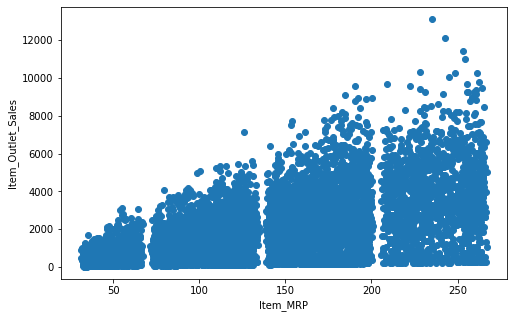

In [47]:
# SCATTER PLOT OF TARGET VARIABLE WITH ITEM MRP
plt.scatter(sales['Item_MRP'],sales['Item_Outlet_Sales'])
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()

# Visualisation and Data-preprocessing

In [48]:
plot_fig =sales.groupby('Outlet_Type').agg({'Item_Outlet_Sales':'mean'}).sort_values(by='Item_Outlet_Sales',ascending=False).reset_index()
plot_fig

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type3,3694.038558
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Grocery Store,339.828500


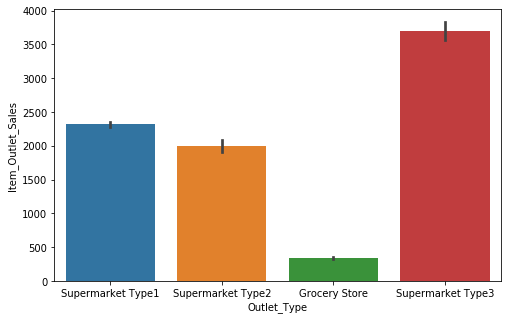

In [49]:
# OUTLET_TYPE VS Sales
sns.barplot('Outlet_Type','Item_Outlet_Sales',data=train)

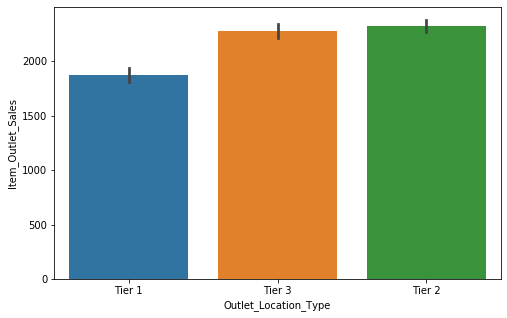

In [50]:
#Outlet_Location_Type vs Sales
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',data=train)

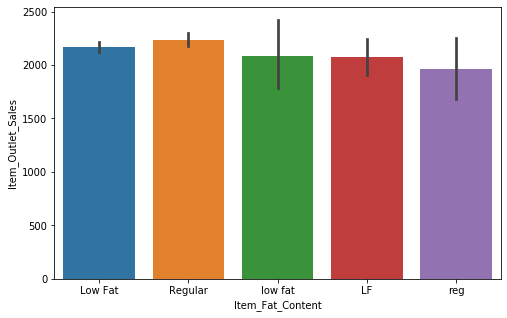

In [51]:
# Item_Fat_Content vs Sales
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train)

In [52]:
# seeing the missing values
sales.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [53]:
sales[sales['Outlet_Location_Type']=='Tier 2']
# tier 2 has only small and nan values


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
...,...,...,...,...,...,...,...,...,...,...,...,...
14185,FDK22,9.800,Low Fat,0.026234,Snack Foods,214.3850,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [54]:
sales[sales['Outlet_Type']=='Grocery Store']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
14119,FDJ15,NaN,Regular,0.040835,Dairy,185.0608,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14123,FDA07,NaN,Regular,0.054180,Fruits and Vegetables,123.5072,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14166,FDQ19,NaN,Regular,0.000000,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,NaN
14173,FDC10,9.800,Regular,0.121982,Snack Foods,119.7098,OUT010,1998,NaN,Tier 3,Grocery Store,NaN


In [55]:
#Imputation of balnk space in Outlet_Size
sales.loc[sales['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
sales.loc[sales['Outlet_Location_Type']=='Tier 2','Outlet_Size']='Small'
sales['Outlet_Size'].isna().sum()

0

In [56]:
#filling the missing values in the item_weight
sales['Item_Weight']=sales['Item_Weight'].fillna(sales.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
sales.groupby('Item_Identifier')['Item_Weight'].transform('mean')

0         9.30
1         5.92
2        17.50
3        19.20
4         8.93
         ...  
14199    10.50
14200     7.60
14201    10.00
14202    15.30
14203     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [57]:
sales['Item_Weight'].isna().any()

False

In [58]:
# filling missing values with corresponding item identifier mean value
sales['Item_Visibility'].replace(0.0,value=np.nan,inplace=True)  # first replace 0 with nan values
sales['Item_Visibility']=sales['Item_Visibility'].fillna(sales.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [59]:
#Data-preprocessing
sales['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

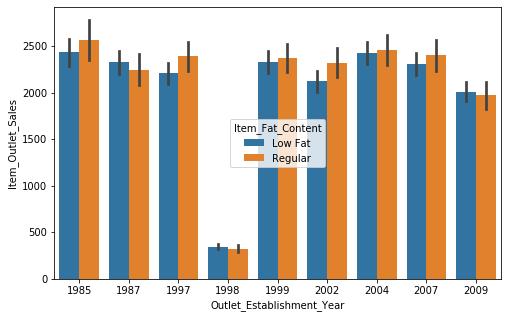

In [60]:
#fat_content vs years vs Sales
sns.barplot('Outlet_Establishment_Year','Item_Outlet_Sales',hue='Item_Fat_Content',data=sales)

In [61]:
#Outlet_year_establishment
sales['Outlet_Years']=2020-sales['Outlet_Establishment_Year']
sales['Outlet_Years'].value_counts()

35    2439
33    1553
23    1550
21    1550
16    1550
18    1548
11    1546
13    1543
22     925
Name: Outlet_Years, dtype: int64

In [62]:
#Feature Engineering for Item_Identifier variable
sales['Item_Identifier']=sales['Item_Identifier'].str[0:2]
sales['Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [63]:
sales['Item_Identifier']=sales['Item_Identifier'].replace({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
sales['Item_Identifier'].unique()

array(['Food', 'Drinks', 'Non-Consumable'], dtype=object)

In [64]:
# mark non consumable as separate category in fat_content_variable
sales.loc[sales['Item_Identifier']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

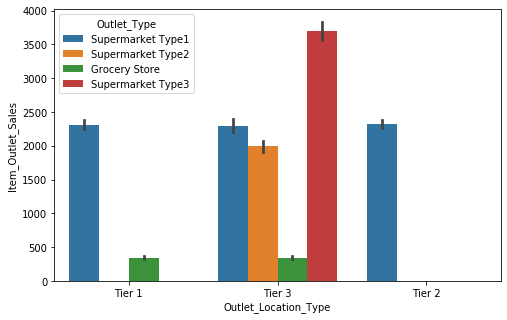

In [65]:
#outlet_location vs outlet_type vs Sales
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=sales)

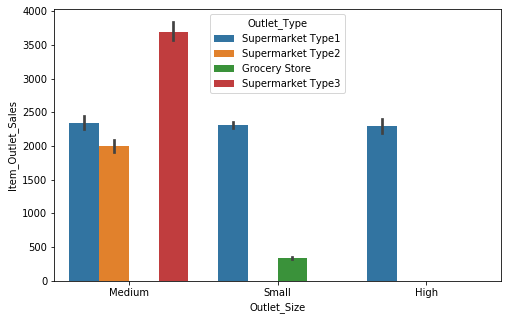

In [66]:
#outlet_size vs outlet_type vs Sales
sns.barplot('Outlet_Size','Item_Outlet_Sales',hue='Outlet_Type',data=sales)

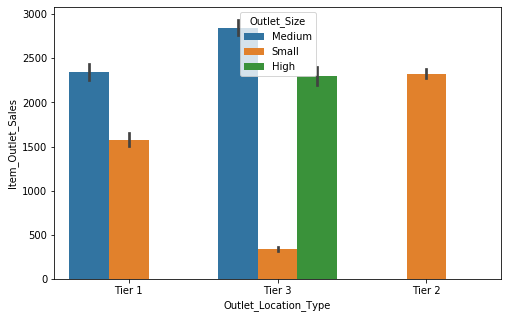

In [67]:
#outlet_location vs outlet_size vs Sales
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Size',data=sales)

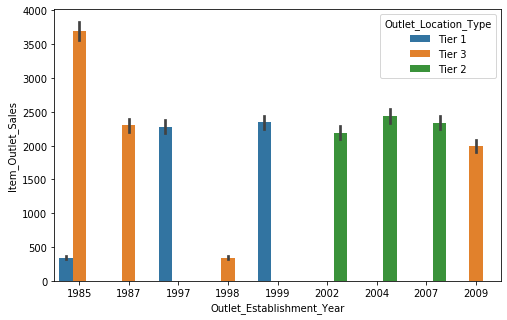

In [68]:
#outlet_location vs years vs Sales
sns.barplot('Outlet_Establishment_Year','Item_Outlet_Sales',hue='Outlet_Location_Type',data=sales)

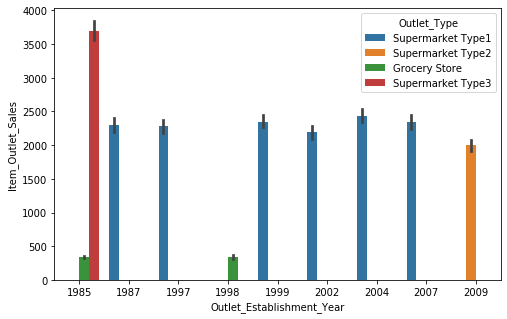

In [69]:
#outlet_type vs years vs Sales
sns.barplot('Outlet_Establishment_Year','Item_Outlet_Sales',hue='Outlet_Type',data=sales)

In [29]:
# Label encoding 
var_cat=['Outlet_Size','Outlet_Location_Type','Item_Type','Outlet_Years']
le=LabelEncoder()
for i in var_cat:
  sales[i]=le.fit_transform(sales[i])

In [30]:
#one hot encoding 
sales=pd.get_dummies(sales,columns=['Item_Identifier','Outlet_Type','Item_Fat_Content','Outlet_Identifier'])

In [31]:
sales1=sales.copy()
sales.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [32]:
scale=MinMaxScaler()
col=list(sales.columns.drop('Item_Outlet_Sales'))
col
sales2=scale.fit_transform(sales)

In [33]:
sales=pd.DataFrame(sales2,columns=sales.columns)
sales["Item_Outlet_Sales"]=sales1['Item_Outlet_Sales']
sales.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Item_Identifier_Drinks,Item_Identifier_Food,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.282525,0.038399,0.266667,0.927507,0.5,0.0,3735.1380,0.500,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,0.048346,0.933333,0.072068,0.5,1.0,443.4228,0.000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.040593,0.666667,0.468288,0.5,0.0,2097.2700,0.500,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,0.059588,0.400000,0.640093,1.0,1.0,732.3800,0.625,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.034158,0.600000,0.095805,0.0,1.0,994.7052,0.875,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
sales_train=sales.iloc[:8523,:]
sales_test=sales.iloc[8523:,:]
sales_test.drop(columns=['Item_Outlet_Sales'],inplace=True)
sales_train.shape,sales_test.shape

((8523, 28), (5681, 27))

In [35]:
# listing the features in the data
features=['Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Years', 'Item_Identifier_Drinks', 'Item_Identifier_Food',
       'Item_Identifier_Non-Consumable', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049']

In [36]:
X=sales_train[features]
y=sales_train['Item_Outlet_Sales']
X_test_sales=sales_test[features]

# Splitting the data to train and test

In [37]:
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,test_size=0.20)
X_train.shape,X_val.shape,y_val.shape

((6818, 21), (1705, 21), (1705,))

In [38]:
# user-defined function
def model_details(model,alg):
    y_pred=model.predict(X_val)
    rmse=np.sqrt(mse(y_val,y_pred))
    acc=round(model.score(X_val,y_val)*100,2)
    cvs=cross_val_score(model,X_val,y_val,cv=5)
    mean=round(cvs.mean()*100,2)
    std=round(cvs.std()*2,2)
    print("Model Report")
    print('Accuracy of {}: {}%'.format(alg,acc),)
    print('RMSE Value: ',round(rmse,2))
    print('Cross Validation Score: Mean - {} | Std - {}'.format(mean,std))

# Linear Regression

In [39]:
reg=LinearRegression(normalize=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
model_details(reg,'LinearRegression')

Model Report
Accuracy of LinearRegression: 58.05%
RMSE Value:  1067.84
Cross Validation Score: Mean - 57.36 | Std - 0.07


In [41]:
ypred=reg.predict(X_val)
y_val,ypred[:6]

(7503    1743.0644
 2957     356.8688
 7031     377.5086
 1084    5778.4782
 856     2356.9320
           ...    
 7205    3004.0896
 3257     890.8404
 6346     629.1810
 6318     253.0040
 6339     976.7286
 Name: Item_Outlet_Sales, Length: 1705, dtype: float64,
 array([1360.,  624.,  864., 4144., 3376.,  640.]))

# Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5,min_samples_leaf=100,min_samples_split=5)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [43]:
model_details(dtr,'DecisionTreeRegressor')

Model Report
Accuracy of DecisionTreeRegressor: 60.94%
RMSE Value:  1030.35
Cross Validation Score: Mean - 38.99 | Std - 0.04


# Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=110).fit(X_train,y_train)

In [46]:
model_details(rf,'RandomForestRegressor')

Model Report
Accuracy of RandomForestRegressor: 57.78%
RMSE Value:  1071.27
Cross Validation Score: Mean - 56.04 | Std - 0.09


# Hyperparameter Tuning of Random Forest

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 100], 'max_features': [5, 60], 
 'max_depth': [10, 200, None], 'bootstrap': [True, False]}
]

In [48]:
from sklearn import metrics
from sklearn.metrics import r2_score
grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=110,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [49]:
grid_search_forest.best_params_, grid_search_forest.best_score_

({'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 100},
 -1253126.7009803008)

In [51]:
rf=RandomForestRegressor(n_estimators=200,max_depth=15,random_state=110, min_samples_split = 100, min_samples_leaf=7,
                        min_weight_fraction_leaf=0.02, max_leaf_nodes=40).fit(X_train,y_train)

In [52]:
y=rf.predict(sales_test[features])
y[:10]

array([1660.92613752, 1359.67692785,  568.53352471, 2426.34708182,
       5910.32793361, 1949.7296241 ,  714.20745525, 2126.40254033,
       1497.67822565, 3190.24912308])

In [53]:
sub=pd.read_csv("C:\\Users\\BABU\\Downloads\\sample_submission_8RXa3c6.csv")

test_sales_pred=rf.predict(sales_test[features])

sub['Item_Outlet_Sales']=y
sub.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1660.926138
1,FDW14,OUT017,1359.676928
2,NCN55,OUT010,568.533525
3,FDQ58,OUT017,2426.347082
4,FDY38,OUT027,5910.327934
5,FDH56,OUT046,1949.729624
6,FDL48,OUT018,714.207455
7,FDC48,OUT027,2126.402540
8,FDN33,OUT045,1497.678226
9,FDA36,OUT017,3190.249123


In [56]:
#prediction of item sales on train dataset

y_test_rf=rf.predict(X_val)
pred_rf=pd.DataFrame(y_test_rf,columns=['predicted_rf'])
true_values=list(y_val.values)
pred_rf['true_value']=true_values

# comparision between true and predicted value
comp=pred_rf
comp=comp.iloc[:20]
true_value=comp['true_value']
predicted_value=comp['predicted_rf']

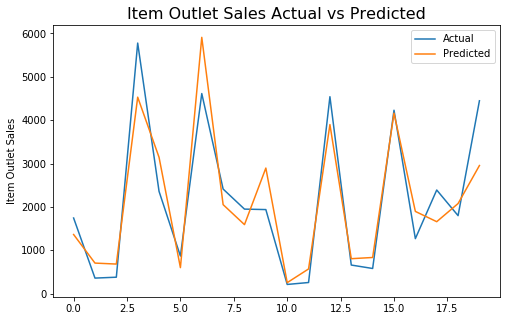

In [57]:
plt.plot(true_value)
plt.plot(predicted_value)
plt.ylabel('Item Outlet Sales')
plt.legend(['Actual','Predicted'])
plt.title("Item Outlet Sales Actual vs Predicted",fontsize=16)
plt.show()

In [58]:
model_details(rf,'RandomForestRegressor')

Model Report
Accuracy of RandomForestRegressor: 62.05%
RMSE Value:  1015.68
Cross Validation Score: Mean - 60.74 | Std - 0.08
